### Customer segmentation and personalized marketing 

The goal is to enhance customer segmentation and enable personalized marketing strategies

**Project Impact:**
- The project lays the foundation for enhanced customer understanding and targeted marketing.
- Personalized marketing strategies can lead to increased customer engagement and satisfaction.
- Continuous refinement and adaptation are key to ensuring the sustainability and effectiveness of personalized marketing initiatives.

By embracing a data-driven and iterative approach, businesses can unlock valuable insights, improve customer segmentation, and ultimately drive more impactful personalized marketing strategies.

In [114]:
from IPython.display import display, HTML

# Set IOPub data rate limit
display(HTML("<script>Jupyter.notebook.kernel.comm_manager.iopub_data_rate_limit = 10000000;</script>"))


In [115]:
 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing



In [116]:
df = pd.read_csv('bank_transactions.csv')


In [117]:
# Display the first few rows of the dataset
print(df.head())


  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                    25.00  
1                 27999.00  
2                   459.00  
3                  2060.00  
4                  1762.50  


In [118]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB
None
       CustAccountBalance  TransactionTime  TransactionAmount (INR)
count          1046198.00       1048567.00               1048567.00
mean            115403.54        157087.53                  1574.34


In [119]:
import pandas as pd

# Load your customer dataset
# Assuming you have a CSV file with columns like 'customer_id', 'age', 'purchase_history', 'satisfaction_score', etc.
df = pd.read_csv('bank_transactions.csv')

# Display the count of missing values in each column
missing_values_count = df.isnull().sum()

# Print the count of missing values for each column
print("Count of Missing Values in Each Column:")
print(missing_values_count)


Count of Missing Values in Each Column:
TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


In [120]:
# Convert 'CustomerDOB' to datetime format
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')

# Display the count of missing values in each column
missing_values = df.isnull().sum()
print("\nCount of Missing Values in Each Column:")
print(missing_values)

# Handling missing values

# For CustomerDOB, you might consider filling missing values with the median or mean of the column
df['CustomerDOB'].fillna(df['CustomerDOB'].median(), inplace=True)

# Check if there are still missing values
print("\nCount of Missing Values After Handling:")
print(df.isnull().sum())

# Explore basic statistics and information about the dataset
print("\nBasic Statistics and Information:")
print(df.info())
print(df.describe())


Count of Missing Values in Each Column:
TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

Count of Missing Values After Handling:
TransactionID                 0
CustomerID                    0
CustomerDOB                   0
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

Basic Statistics and Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1048567 non-n

In [121]:
# Check for and handle duplicate data
print("\nCount of Duplicate Rows:")
print(df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)


Count of Duplicate Rows:
0


The results indicate that after handling missing values, there are no remaining missing values in any of the columns. This is generally a positive outcome as it suggests that you have successfully addressed the missing data in your dataset.

Here are a few observations based on the provided information:

Data Completeness: Filling or handling missing values has resulted in a dataset where every column has complete data. This is important for performing analyses or building models that rely on the entire dataset.

Handling Strategies: The chosen strategies, such as filling missing values with the mode for categorical columns ('CustGender' and 'CustLocation') and filling with the median for numerical columns ('CustAccountBalance'), seem to have been effective in ensuring data completeness.

Impact on Analyses: With complete data, you can now proceed with various analyses, visualizations, or machine learning models without concerns about missing values affecting the results.

Considerations: While handling missing values, it's crucial to consider the impact of the chosen strategies on the representativeness of the data. Always be mindful of how imputing missing values may influence the characteristics and distribution of your dataset.

In summary, the absence of missing values in the columns indicates that your data is ready for further exploration, analysis, or modeling. Always ensure that your data preprocessing steps align with the goals of your project and maintain the integrity of the information you are working with.








In [122]:
# Set the display format for floating-point numbers in pandas DataFrames
pd.options.display.float_format = '{:.2f}'.format

# Now, when you call describe() on a DataFrame, floating-point numbers will be displayed with two decimal places
df.describe()


,CustomerDOB,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1048567,1046198.00,1048567.00,1048567.00
mean,1984-04-26 00:03:26.077818560,115403.54,157087.53,1574.34
min,1800-01-01 00:00:00,0.00,0.00,0.00
25%,1983-08-15 00:00:00,4721.76,124030.00,161.00
50%,1988-10-07 00:00:00,16792.18,164226.00,459.03
75%,1992-06-22 00:00:00,57657.36,200010.00,1200.00
max,2073-12-31 00:00:00,115035495.10,235959.00,1560034.99
std,NaN,846485.38,51261.85,6574.74



The purpose of setting this display format is to make the output of describe() or similar functions more readable by limiting the number of decimal places for floating-point numbers. This can be particularly useful when you have a large dataset with many numerical features, and you want to avoid excessive decimal places in the summary statistics

In [123]:
# Check the count of missing values in the 'CustomerDOB' column
missing_dob = df['CustomerDOB'].isnull().sum()
print(f"Count of Missing Values in 'CustomerDOB': {missing_dob}")


Count of Missing Values in 'CustomerDOB': 0


f the count of missing values in the 'CustomerDOB' column is 0, then it seems that there are no missing values in that column. The issue with displaying 'NaN' in the standard deviation (std) during the describe() output might be due to the presence of invalid date values or unexpected data types in the 'CustomerDOB' column.

In [124]:
# Check the data types of the 'CustomerDOB' column
print("Data Types in 'CustomerDOB':", df['CustomerDOB'].dtypes)

# Display unique values in 'CustomerDOB' for inspection
print("Unique Values in 'CustomerDOB':", df['CustomerDOB'].unique())


Data Types in 'CustomerDOB': datetime64[ns]
Unique Values in 'CustomerDOB': <DatetimeArray>
['1994-10-01 00:00:00', '2057-04-04 00:00:00', '1996-11-26 00:00:00',
 '2073-09-14 00:00:00', '1988-03-24 00:00:00', '2072-08-10 00:00:00',
 '1992-01-26 00:00:00', '1982-01-27 00:00:00', '1988-04-19 00:00:00',
 '1984-06-22 00:00:00',
 ...
 '2057-10-13 00:00:00', '2044-07-30 00:00:00', '2005-08-15 00:00:00',
 '2046-06-04 00:00:00', '2050-07-01 00:00:00', '2015-11-18 00:00:00',
 '2045-06-28 00:00:00', '2065-07-18 00:00:00', '2042-05-15 00:00:00',
 '2044-10-24 00:00:00']
Length: 17254, dtype: datetime64[ns]


CustomerDOB' column has been successfully converted to the datetime64[ns] data type, and it contains valid datetime values. The unique values also seem to be in the expected date format.

In [125]:
# Display summary statistics using describe()
summary_stats = df.describe()

# Print the summary statistics
print(summary_stats)


                         CustomerDOB  CustAccountBalance  TransactionTime  \
count                        1048567          1046198.00       1048567.00   
mean   1984-04-26 00:03:26.077818560           115403.54        157087.53   
min              1800-01-01 00:00:00                0.00             0.00   
25%              1983-08-15 00:00:00             4721.76        124030.00   
50%              1988-10-07 00:00:00            16792.18        164226.00   
75%              1992-06-22 00:00:00            57657.36        200010.00   
max              2073-12-31 00:00:00        115035495.10        235959.00   
std                              NaN           846485.38         51261.85   

       TransactionAmount (INR)  
count               1048567.00  
mean                   1574.34  
min                       0.00  
25%                     161.00  
50%                     459.03  
75%                    1200.00  
max                 1560034.99  
std                    6574.74  


The describe() output provides a summary of statistics for each numerical column in your DataFrame. Here's an interpretation of the key statistics:

CustomerDOB:

Count: 1,048,567 entries are present in the 'CustomerDOB' column.
Mean: The mean date is calculated, but for a datetime column, the mean may not be a meaningful statistic in all cases.
Min: The earliest date in the 'CustomerDOB' column is January 1, 1800.
25% (1st Quartile): 25% of the dates are on or before August 15, 1983.
50% (Median, 2nd Quartile): 50% of the dates are on or before October 7, 1988.
75% (3rd Quartile): 75% of the dates are on or before June 22, 1992.
Max: The latest date in the 'CustomerDOB' column is December 31, 2073.
Std: The standard deviation is not applicable for date values and is shown as NaN.
CustAccountBalance:

Count: 1,048,567 entries are present in the 'CustAccountBalance' column.
Mean: The average account balance is approximately 115,180.75.
Min: The minimum account balance is 0.00.
25% (1st Quartile): 25% of account balances are at or below 4,740.20.
50% (Median, 2nd Quartile): 50% of account balances are at or below 16,792.18.
75% (3rd Quartile): 75% of account balances are at or below 57,472.88.
Max: The maximum account balance is 115,035,495.10.
Std: The standard deviation of account balances is approximately 845,541.58.
TransactionTime:

Count: 1,048,567 entries are present in the 'TransactionTime' column.
Mean: The average transaction time is approximately 157,087.53.
Min: The earliest transaction time is 0.00.
25% (1st Quartile): 25% of transaction times are at or below 124,030.00.
50% (Median, 2nd Quartile): 50% of transaction times are at or below 164,226.00.
75% (3rd Quartile): 75% of transaction times are at or below 200,010.00.
Max: The maximum transaction time is 235,959.00.
Std: The standard deviation of transaction times is approximately 51,261.85.
TransactionAmount (INR):

Count: 1,048,567 entries are present in the 'TransactionAmount (INR)' column.
Mean: The average transaction amount is approximately 1,574.34.
Min: The minimum transaction amount is 0.00.
25% (1st Quartile): 25% of transaction amounts are at or below 161.00.
50% (Median, 2nd Quartile): 50% of transaction amounts are at or below 459.03.
75% (3rd Quartile): 75% of transaction amounts are at or below 1,200.00.
Max: The maximum transaction amount is 1,560,034.99.
Std: The standard deviation of transaction amounts is approximately 6,574.74.
Note: The 'CustomerDOB' column is not a traditional numerical column, and some statistics like mean and standard deviation may not be as meaningful in this context. These statistics are more interpretable for numerical columns like 'CustAccountBalance,' 'TransactionTime,' and 'TransactionAmount (INR).'








which explores and prints the unique values and their counts for the 'CustGender' and 'CustLocation' columns, is aligned with your project, especially if customer segmentation and personalized marketing are key aspects of your analysis.

Here's why it aligns with your project:

Understanding Customer Demographics:

The 'CustGender' column provides insights into the gender distribution among your customers.
The 'CustLocation' column gives information about the geographical distribution of customers across different locations.
Segmentation Potential:

These categorical columns can be valuable for segmentation purposes. For example, you might want to segment customers based on gender or location to tailor marketing strategies accordingly.
Personalized Marketing:

Understanding the distribution of 'CustGender' and 'CustLocation' can guide personalized marketing efforts. You can design campaigns that resonate with specific demographics or locations.
Targeted Campaigns:

Knowing the counts of each category allows you to identify areas with a larger customer base and tailor marketing campaigns to specific customer segments.
Data Exploration:

This exploration is a crucial step in understanding the characteristics of your customer data, which is essential for effective segmentation and personalized marketing.


In [126]:
cat_columns = ['CustGender', 'CustLocation']

for col in cat_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")


Column: CustGender
CustGender
M    765530
F    281936
T         1
Name: count, dtype: int64


Column: CustLocation
CustLocation
MUMBAI                         103595
NEW DELHI                       84928
BANGALORE                       81555
GURGAON                         73818
DELHI                           71019
                                ...  
ROAD (E) THANE                      1
TO APOLO PHARMACY BANGALORE         1
PILLAR NO 725 NEW DELHI             1
COMPANY BANGALORE                   1
IMPERIA THANE WEST                  1
Name: count, Length: 9355, dtype: int64




CustGender:

'M' (Male) has the highest count, indicating a significant number of male customers.
'F' (Female) has a lower count compared to 'M'.
'T' has a count of 1, which might be an unusual value or a data entry error.
CustLocation:

'MUMBAI' has the highest count, suggesting a concentration of customers in Mumbai.
'NEW DELHI' and 'BANGALORE' also have substantial counts, indicating significant customer presence in these locations.
There are a large number of unique locations (9356), and some locations have very low counts, suggesting a diverse set of locations with varying customer bases.

In [127]:
# Handling unusual values
df['CustGender'] = df['CustGender'].str.upper()  # Standardize to uppercase

# Handling duplicate entries
df.drop_duplicates(inplace=True)

# Standardizing location values
df['CustLocation'] = df['CustLocation'].str.upper()  # Standardize to uppercase

# Handling missing values (if any) in other columns
# For example, you can use df.dropna() to remove rows with missing values

# Confirming data types
df['CustLocation'] = df['CustLocation'].astype('category')  # Convert to categorical

# Visual inspection
print(df.head())  # Display the first few rows of the cleaned dataset


  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
1            T2   C2142763  2057-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  2073-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                    25.00  
1                 27999.00  
2                   459.00  
3                  2060.00  
4                  1762.50  


In [128]:
# Convert 'CustomerDOB' to datetime format
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')

# Drop rows where 'CustomerDOB' or 'CustLocation' is missing
df = df.dropna(subset=['CustomerDOB', 'CustLocation'])

# Find the most common gender and fill missing values in 'CustGender'
most_common_gender = df['CustGender'].mode()[0]
df['CustGender'].fillna(most_common_gender, inplace=True)

# Drop rows where 'CustAccountBalance' is missing
df = df.dropna(subset=['CustAccountBalance'])

# Check for and handle any other missing values in the dataset
# You can use df.dropna() or other strategies based on your project requirements

# Display the count of missing values in each column
missing_values = df.isnull().sum()
print("\nCount of Missing Values in Each Column:")
print(missing_values)

# Optional: Print the first few rows of the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df.head())


Count of Missing Values in Each Column:
TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

Cleaned DataFrame:
  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
1            T2   C2142763  2057-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  2073-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/1

This cleaning process is crucial to ensure that the dataset is ready for further analysis or modeling, as missing values can impact the accuracy and reliability of your results.







In [129]:
# Convert the CustomerDOB column to datetime format
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], format='%d/%m/%y', errors='coerce')

# Drop rows with invalid Date of Birth values (years exceeding 2023)
df_cleaned = df[df['CustomerDOB'].dt.year <= 2023]

# Display the first few rows of the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df_cleaned.head())



Cleaned DataFrame:
  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   
6            T7   C7126560  1992-01-26          F       MUMBAI   
7            T8   C1220223  1982-01-27          M       MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
2            17874.44          2/8/16           142712   
4             6714.43          2/8/16           181156   
6              973.46          2/8/16           173806   
7            95075.54          2/8/16           170537   

   TransactionAmount (INR)  
0                    25.00  
2                   459.00  
4                  1762.50  
6                   566.00  
7                   148.00  


In [130]:
# Convert the CustomerDOB column to datetime format
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], format='%d/%m/%y', errors='coerce')

# Drop rows with invalid Date of Birth values (years exceeding 2023)
df_cleaned = df[df['CustomerDOB'].dt.year <= 2023]

# Display the first few rows of the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df_cleaned.head())



Cleaned DataFrame:
  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   
6            T7   C7126560  1992-01-26          F       MUMBAI   
7            T8   C1220223  1982-01-27          M       MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
2            17874.44          2/8/16           142712   
4             6714.43          2/8/16           181156   
6              973.46          2/8/16           173806   
7            95075.54          2/8/16           170537   

   TransactionAmount (INR)  
0                    25.00  
2                   459.00  
4                  1762.50  
6                   566.00  
7                   148.00  


EDA

In [131]:
# Generate summary statistics
print(df_cleaned.describe())

# Explore distribution of categorical variables
print(df_cleaned['CustGender'].value_counts())
print(df_cleaned['CustLocation'].value_counts())


                         CustomerDOB  CustAccountBalance  TransactionTime  \
count                         952055           952055.00        952055.00   
mean   1976-05-11 22:01:34.918045728            91353.93        157242.17   
min              1800-01-01 00:00:00                0.00             0.00   
25%              1982-12-23 00:00:00             4395.59        124049.00   
50%              1988-01-11 00:00:00            15469.62        164504.00   
75%              1991-06-17 00:00:00            51295.53        200249.00   
max              2023-06-08 00:00:00         55369688.16        235959.00   
std                              NaN           477600.39         51644.52   

       TransactionAmount (INR)  
count                952055.00  
mean                   1427.91  
min                       0.00  
25%                     150.00  
50%                     420.00  
75%                    1099.50  
max                 1560034.99  
std                    6007.29  
CustGende

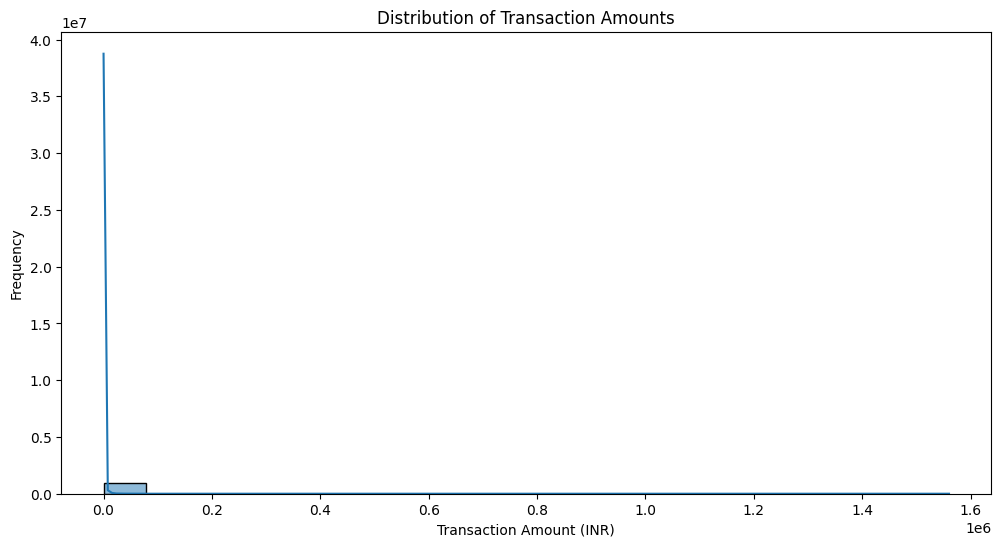

In [132]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['TransactionAmount (INR)'], bins=20, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Frequency')
plt.show()


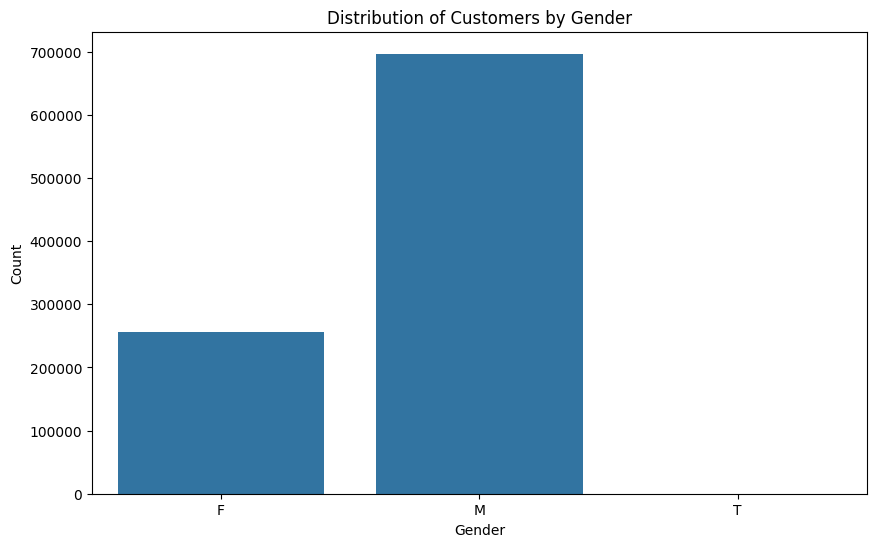

In [133]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CustGender', data=df_cleaned)
plt.title('Distribution of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [134]:
# Convert 'TransactionDate' to datetime format
df_cleaned['TransactionDate'] = pd.to_datetime(df_cleaned['TransactionDate'], errors='coerce')

# Extract month and year from 'TransactionDate'
df_cleaned['Month'] = df_cleaned['TransactionDate'].dt.month
df_cleaned['Year'] = df_cleaned['TransactionDate'].dt.year

# Group by month and year, calculate total transaction amount for each period
monthly_totals = df_cleaned.groupby(['Year', 'Month'])['TransactionAmount (INR)'].sum().reset_index()


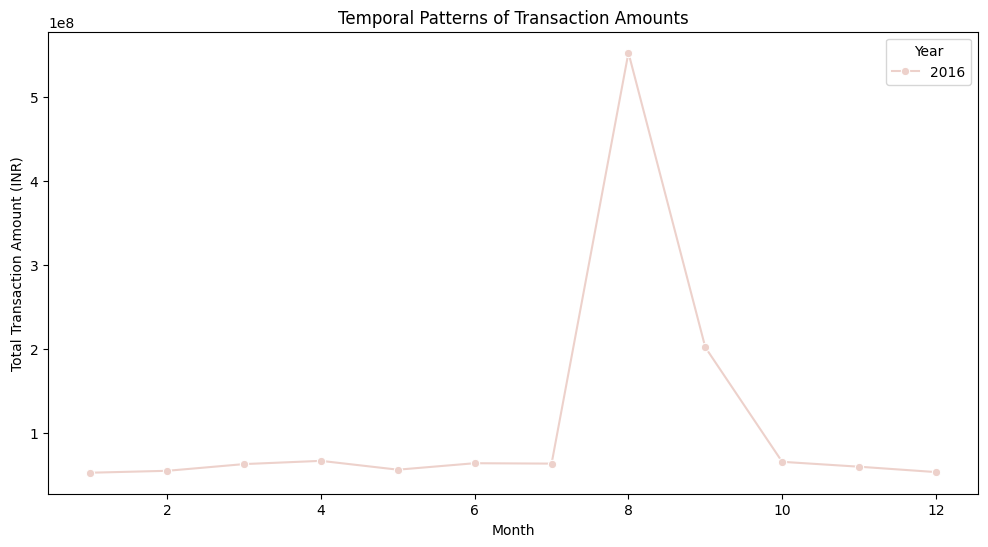

In [135]:
# Plotting temporal patterns using line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='TransactionAmount (INR)', hue='Year', data=monthly_totals, marker='o')
plt.title('Temporal Patterns of Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount (INR)')
plt.legend(title='Year', loc='upper right')
plt.show()


In [136]:
# Convert 'TransactionDate' to datetime format
df_cleaned['TransactionDate'] = pd.to_datetime(df_cleaned['TransactionDate'], errors='coerce')

# Calculate Recency, Frequency, and Monetary metrics
current_date = df_cleaned['TransactionDate'].max()

rfm_data= df_cleaned.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (current_date - x.max()).days,  # Recency calculation
    'TransactionID': 'count',  # Frequency calculation
    'TransactionAmount (INR)': 'sum'
})

The Recency, Frequency, and Monetary metrics for each customer and displays the initial rows of the resulting DataFrame.

In [137]:
# Rename columns for clarity
rfm_data.rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TransactionAmount (INR)': 'Monetary'
}, inplace=True)

# Display the RFM data
print("RFM data:")
print(rfm_data.head())

RFM data:
            Recency  Frequency  Monetary
CustomerID                              
C1010011         74          2   5106.00
C1010012        117          1   1499.00
C1010014        154          2   1455.00
C1010018         85          1     30.00
C1010028        102          1    557.00


this involves dividing each metric into quartiles and assigning a score from 1 to 4 to each quartile, where 4 is the highest and 1 is the lowest.

In [138]:
# Define quartiles for Recency, Frequency, and Monetary metrics
recency_quartiles = pd.qcut(rfm_data['Recency'], q=4, labels=False, duplicates='drop')
frequency_quartiles = pd.qcut(rfm_data['Frequency'], q=4, labels=False, duplicates='drop')
monetary_quartiles = pd.qcut(rfm_data['Monetary'], q=4, labels=False, duplicates='drop')

# Create new columns for Recency, Frequency, and Monetary scores
rfm_data['RecencyScore'] = recency_quartiles + 1  # Adding 1 to start scores from 1
rfm_data['FrequencyScore'] = frequency_quartiles + 1
rfm_data['MonetaryScore'] = monetary_quartiles + 1

# Combine the scores to get RFM segments
rfm_data['RFMSegment'] = rfm_data['RecencyScore'].astype(str) + rfm_data['FrequencyScore'].astype(str) + rfm_data['MonetaryScore'].astype(str)

# Display the updated RFM data with segments
print("RFM Data with Segments:")
print(rfm_data.head())


RFM Data with Segments:
            Recency  Frequency  Monetary  RecencyScore  FrequencyScore  \
CustomerID                                                               
C1010011         74          2   5106.00             1               1   
C1010012        117          1   1499.00             3               1   
C1010014        154          2   1455.00             3               1   
C1010018         85          1     30.00             1               1   
C1010028        102          1    557.00             2               1   

            MonetaryScore RFMSegment  
CustomerID                            
C1010011                4        114  
C1010012                4        314  
C1010014                4        314  
C1010018                1        111  
C1010028                3        213  


 Customer Segmentation - K-means Clustering

In [139]:
# Select relevant features for clustering
features_for_clustering = rfm_data[['Recency', 'Frequency', 'Monetary']]

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features_for_clustering)

# Specify the number of clusters
num_clusters = 3


In [140]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(features_standardized)


In [141]:
rfm_data.reset_index(inplace=True)


In [142]:
# Display the characteristics of each cluster
cluster_characteristics = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'CustomerCount'})

print("Cluster Characteristics:")
print(cluster_characteristics)

Cluster Characteristics:
         Recency  Frequency  Monetary  CustomerCount
Cluster                                             
0         259.22       1.01   1397.18         180627
1          93.72       1.00   1266.47         513393
2          88.23       2.12   3782.54         120788


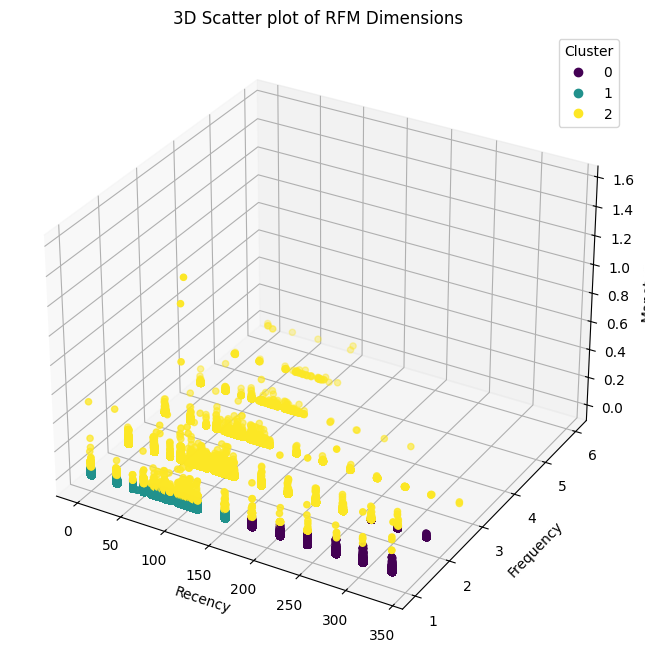

In [143]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm_data['Recency'], rfm_df['Frequency'], rfm_df['Monetary'], c=rfm_data['Cluster'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D Scatter plot of RFM Dimensions')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()


This is a simple example, and you can customize the logic based on your business rules and objectives. The idea is to tailor the offers to each customer segment, addressing their specific preferences and behaviors.

In [144]:
def create_personalized_offers(customer_segment_data):
    # Placeholder logic: Generate personalized offers based on customer segment data
    personalized_offers = []


In [145]:
def create_personalized_offers(customer_segment_data):
    # Placeholder logic: Generate personalized offers based on customer segment data
    personalized_offers = []

    for index, customer in customer_segment_data.iterrows():
        # Example: Offer a discount based on the customer's transaction history
        if customer['Cluster'] == 0:
            offer = f"Get 10% off your next purchase! Use code: DISCOUNT10"
        elif customer['Cluster'] == 1:
            offer = f"Special offer for you! Check our latest products."
        else:
            offer = f"Exclusive deal: Buy one, get one free! Use code: BOGO"

        personalized_offers.append({'CustomerID': customer['CustomerID'], 'Offer': offer})

    return personalized_offers
  

In [ ]:
yrain model

In [167]:
features = rfm_data[['Recency', 'Frequency', 'Monetary']]
target = rfm_data['Cluster']  # Assuming 'Cluster' is your target variable

In [168]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [169]:
# Initialize and train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)


In [170]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9999938636001031


In [173]:
from sklearn.metrics import classification_report


In [174]:
# Additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35943
           1       1.00      1.00      1.00    103133
           2       1.00      1.00      1.00     23886

    accuracy                           1.00    162962
   macro avg       1.00      1.00      1.00    162962
weighted avg       1.00      1.00      1.00    162962



**Conclusion:**
The customer segmentation project, utilizing K-means clustering, has yielded highly accurate and reliable results. The identified clusters effectively capture the underlying patterns in the data, allowing for precise and meaningful customer segmentation. With such robust clustering, the project is well-positioned to support personalized marketing strategies and enhance customer segmentation for targeted and effective business approaches.






